In [1]:
import os
import torch
import torch.nn as nn
from torch.optim.lr_scheduler import MultiplicativeLR
import numpy as np
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from PIL import Image
import random
import matplotlib.pyplot as plt


In [2]:
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [3]:
!nvidia-smi

Wed Aug  6 15:20:33 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.247.01             Driver Version: 535.247.01   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:05.0 Off |                    0 |
| N/A   53C    P8              10W /  70W |      5MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
student_details = [
    {"name": "Aayush Chhetri", "roll_number": "THA078BEI001", "email": "aayush.078bei001@tcioe.edu.np", "phone": "9869088844"},
    {"name": "Abhishek Prasad Sah", "roll_number": "THA078BEI002", "email": "abhishek.078bei002@tcioe.edu.np", "phone": "9864106036"},
    {"name": "Agrima Regmi", "roll_number": "THA078BEI003", "email": "agrima.078bei003@tcioe.edu.np", "phone": "9808381522"},
    {"name": "Amrit Kandel", "roll_number": "THA078BEI004", "email": "amrit.078bei004@tcioe.edu.np", "phone": "9866115699"},
    {"name": "Anveshan Timsina", "roll_number": "THA078BEI005", "email": "anveshan.078bei005@tcioe.edu.np", "phone": "9862897754"},
    {"name": "Ashish Kandel", "roll_number": "THA078BEI006", "email": "ashish.078bei006@tcioe.edu.np", "phone": "9842519361"},
    {"name": "Binita Adhikari", "roll_number": "THA078BEI008", "email": "binita.078bei008@tcioe.edu.np", "phone": "9761774565"},
    {"name": "Bipul Kumar Dahal", "roll_number": "THA078BEI009", "email": "bipul.078bei009@tcioe.edu.np", "phone": "9868369363"},
    {"name": "Dinanath Padhya", "roll_number": "THA078BEI010", "email": "dinanath.078bei010@tcioe.edu.np", "phone": "9742893416"},
    {"name": "Dipesh Baral", "roll_number": "THA078BEI011", "email": "dipesh.078bei011@tcioe.edu.np", "phone": "9767487279"},
    {"name": "Dipesh Kadal", "roll_number": "THA078BEI013", "email": "dipesh.078bei013@tcioe.edu.np", "phone": "9828927514"},
    {"name": "Dishan Shakya", "roll_number": "THA078BEI014", "email": "dushan.078bei014@tcioe.edu.np", "phone": "9761797002"},
    {"name": "Diwas Dahal", "roll_number": "THA078BEI015", "email": "diwas.078bei015@tcioe.edu.np", "phone": "9864160968"},
    {"name": "Jatin Raut", "roll_number": "THA078BEI017", "email": "jatin.078bei017@tcioe.edu.np", "phone": "9843041090"},
    {"name": "Jenish Pant", "roll_number": "THA078BEI018", "email": "jenish.078bei018@tcioe.edu.np", "phone": "9841551131"},
    {"name": "Kiman Adhikari", "roll_number": "THA078BEI019", "email": "kiman.078bei019@tcioe.edu.np", "phone": "9843969170"},
    {"name": "Krishna Acharya", "roll_number": "THA078BEI020", "email": "krishna.078bei020@tcioe.edu.np", "phone": "9848046988"},
    {"name": "Mukesh Bhatta", "roll_number": "THA078BEI022", "email": "mukesh.078bei022@tcioe.edu.np", "phone": "9861880765"},
    {"name": "Nabin Shrestha", "roll_number": "THA078BEI023", "email": "nabin.078bei023@tcioe.edu.np", "phone": "9841623316"},
    {"name": "Nischal Bhusal", "roll_number": "THA078BEI024", "email": "nischal.078bei024@tcioe.edu.np", "phone": "9841617360"},
    {"name": "Pankaj Bhatt", "roll_number": "THA078BEI025", "email": "pankaj.078bei025@tcioe.edu.np", "phone": "9865920096"},
    {"name": "Prasish Timalsina", "roll_number": "THA078BEI026", "email": "prasish.078bei026@tcioe.edu.np", "phone": "9745355160"},
    {"name": "Pratik Pokharel", "roll_number": "THA078BEI027", "email": "pratik.078bei027@tcioe.edu.np", "phone": "9867404111"},
    {"name": "Pratistha Sapkota", "roll_number": "THA078BEI028", "email": "pratistha.078bei028@tcioe.edu.np", "phone": "9744341824"},
    {"name": "Pujan Pandey", "roll_number": "THA078BEI029", "email": "pujan.078bei029@tcioe.edu.np", "phone": "9844090278"},
    {"name": "Rabin Rai", "roll_number": "THA078BEI030", "email": "rabin.078bei030@tcioe.edu.np", "phone": "9845350482"},
    {"name": "Roshan Shrestha", "roll_number": "THA078BEI031", "email": "roshan.078bei031@tcioe.edu.np", "phone": "9841253880"},
    {"name": "Roshan Singh Saud", "roll_number": "THA078BEI032", "email": "roshan.078bei032@tcioe.edu.np", "phone": "9840088095"},
    {"name": "Sagar Joshi", "roll_number": "THA078BEI033", "email": "sagar.078bei033@tcioe.edu.np", "phone": "9810079516"},
    {"name": "Sandesh Dhital", "roll_number": "THA078BEI034", "email": "sandesh.078bei034@tcioe.edu.np", "phone": "9849781518"},
    {"name": "Sandesh Panthi", "roll_number": "THA078BEI035", "email": "sandesh.078bei035@tcioe.edu.np", "phone": "9841817893"},
    {"name": "Sanjeep Kumar Sharma", "roll_number": "THA078BEI036", "email": "sanjeep.078bei036@tcioe.edu.np", "phone": "9847379577"},
    {"name": "Sanskriti Khatiwada", "roll_number": "THA078BEI037", "email": "sanskriti.078bei037@tcioe.edu.np", "phone": "9742456719"},
    {"name": "Saroj Nagarkoti", "roll_number": "THA078BEI039", "email": "saroj.078bei039@tcioe.edu.np", "phone": "9841745662"},
    {"name": "Satish Khanal", "roll_number": "THA078BEI040", "email": "satish.078bei040@tcioe.edu.np", "phone": "9869363082"},
    {"name": "Shishir Gaire", "roll_number": "THA078BEI041", "email": "shishir.078bei041@tcioe.edu.np", "phone": "9765556415"},
    {"name": "Subham Gautam", "roll_number": "THA078BEI042", "email": "subham.078bei042@tcioe.edu.np", "phone": "9843787118"},
    {"name": "Subrat Dhital", "roll_number": "THA078BEI043", "email": "subrat.078bei043@tcioe.edu.np", "phone": "9864164424"},
    {"name": "Sudip Kumar Thakur", "roll_number": "THA078BEI044", "email": "sudip.078bei044@tcioe.edu.np", "phone": "9865212075"},
    {"name": "Sujan Gupta", "roll_number": "THA078BEI045", "email": "sujan.078bei045@tcioe.edu.np", "phone": "9818233171"},
    {"name": "Utsab Dahal", "roll_number": "THA078BEI046", "email": "utsab.078bei046@tcioe.edu.np", "phone": "9762227144"},
    {"name": "Matina Tuladhar", "roll_number": "THA078BEI047", "email": "matina.078bei047@tcioe.edu.np", "phone": "9810197047"},
    {"name": "Sajen Maharjan", "roll_number": "THA078BEI048", "email": "sajen.078bei048@tcioe.edu.np", "phone": "9863035364"}
]


In [5]:
#Create a folder to store image of the students
# def create_folder(student_details):
#     for student in student_details:
#         path=os.path.join(os.getcwd(), 'data', student['roll_number'])
#         if not os.path.exists(path):
#             os.makedirs(path)
#             print(f"Folder created for {student['name']} at {path}")
#         else:
#             print(f"Folder already exists for {student['name']} at {path}")

# create_folder(student_details)

In [6]:
class SiameseNN(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1=nn.Sequential(
            nn.Conv2d(in_channels=1,out_channels=64,kernel_size=(10,10), padding=0, stride=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=(2,2), stride=2, padding=0)
        )

        self.conv2=nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128,kernel_size=(7,7), padding=0, stride=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=(2,2), stride=2, padding=0)
        )

        self.conv3=nn.Sequential(
            nn.Conv2d(in_channels= 128, out_channels=128, kernel_size=(4,4), padding=0, stride=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=(2,2), stride=2, padding=0)
         )
        
        self.conv4=nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=(4,4), padding=0, stride=1),
            nn.ReLU(inplace=True),
        )

        self.fc1=nn.Sequential(
            nn.Linear(in_features=256*6*6, out_features=4096, bias=True),
            nn.Sigmoid(),

        )
        self.fc2=nn.Sequential(
             nn.Linear(in_features=4096,out_features=1,bias=True),
            nn.Sigmoid()
        )

    def forward_one_branch(self, x):  
            x=self.conv1(x)
            x=self.conv2(x)
            x=self.conv3(x)
            x=self.conv4(x)
            x=x.view(x.size(0), -1)   # Flatten the output
            x=self.fc1(x)
            return x


    def forward(self, input1, input2):
            output1 = self.forward_one_branch(input1)
            output2 = self.forward_one_branch(input2)
            return output1, output2

      
            

In [7]:
class ContrastiveLoss(nn.Module):
    def __init__(self, margin=1.0):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin

    def forward(self, output1, output2, label):
        euclidean_distance = nn.functional.pairwise_distance(output1, output2)
        loss = torch.mean((1 - label) * torch.pow(euclidean_distance, 2) +
                          (label) * torch.pow(torch.clamp(self.margin - euclidean_distance, min=0.0), 2))
        return loss

In [8]:
def initialize_weight(model):
    for m in model.modules():
        if(isinstance(m,(nn.Conv2d))):
            nn.init.xavier_normal_(m.weight)
            if m.bias is not None:
                nn.init.zeros_(m.bias)

        elif(isinstance(m,(nn.Linear))):
            nn.init.xavier_normal_(m.weight)

            if m.bias is not None:
                nn.init.zeros_(m.bias)

In [9]:
transform=transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((105,105)),
    transforms.ToTensor(),
])

In [10]:
class SiamesePairDataset(Dataset):
    def __init__(self, root_dir, transform=None, sample_ratio=1.0):
        self.root_dir = root_dir
        self.transform = transform
        self.sample_ratio=sample_ratio
        self.image_extensions = {'.jpg', '.jpeg', '.png'}

        self.classes = [d for d in os.listdir(root_dir) 
                       if os.path.isdir(os.path.join(root_dir, d))]
        
       
        self.image_paths = {}
        for cls in self.classes:
            cls_path = os.path.join(root_dir, cls)
            images = [f for f in os.listdir(cls_path) 
                     if any(f.lower().endswith(ext) for ext in self.image_extensions)]
            self.image_paths[cls] = [os.path.join(cls_path, f) for f in images]
      
        
        # Remove classes with no images
        self.classes = [cls for cls in self.classes if len(self.image_paths[cls]) > 0]
        
        self.pairs = self.create_pairs()
        if self.sample_ratio < 1.0:
            num_samples = int(len(self.pairs) * self.sample_ratio)
            self.pairs = random.sample(self.pairs, num_samples)

        print(f"Found {len(self.classes)} classes with images")
        print(f"Total pairs created: {len(self.pairs)}")

   
    
    def create_pairs(self):
        pairs = []
        if len(self.classes) < 2:
            print("Warning: Need at least 2 classes with images to create negative pairs")
            return pairs
            
        for cls in self.classes:
            imgs = self.image_paths[cls]
        
            if len(imgs) < 2:
                #print(f"Warning: Class {cls} has only {len(imgs)} image(s)")
                continue
                
            # Positive pairs (same class, label=0)
            for i in range(len(imgs)):
                for j in range(i + 1, len(imgs)):
                    pairs.append((imgs[i], imgs[j], 0))

            # Negative pairs (different classes, label=1)
            neg_classes = [c for c in self.classes if c != cls and len(self.image_paths[c]) > 0]
            if not neg_classes:
                print(f"Warning: No valid negative classes for {cls}")
                continue
                
            for _ in range(len(imgs)):
                neg_cls = random.choice(neg_classes)
                img1 = random.choice(imgs)
                img2 = random.choice(self.image_paths[neg_cls])
                pairs.append((img1, img2, 1))

        # print(f"pairs sample", pairs[:5])  # Print first 5 pairs for debugging
        return pairs
    

    def __len__(self):
        return len(self.pairs)

    def __getitem__(self, idx):
        img1_path, img2_path, label = self.pairs[idx]
        
        try:
            img1 = Image.open(img1_path)
            img2 = Image.open(img2_path)
            
            if self.transform:
                img1 = self.transform(img1)
                img2 = self.transform(img2)
                
            return img1, img2, torch.tensor(label, dtype=torch.float32)
        except Exception as e:
            print(f"Error loading images {e}")
            raise e

In [11]:
DATASET_PATH = os.path.join(os.getcwd(), '4/lfw-deepfunneled/lfw-deepfunneled')
dataset=SiamesePairDataset(root_dir=DATASET_PATH, transform=transform,sample_ratio=1.0)

Found 5749 classes with images
Total pairs created: 251421


In [12]:
dataset[10]

(tensor([[[0.9412, 0.9412, 0.9412,  ..., 0.9176, 0.9294, 0.9412],
          [0.9412, 0.9412, 0.9412,  ..., 0.9255, 0.9373, 0.9451],
          [0.9412, 0.9412, 0.9412,  ..., 0.9333, 0.9412, 0.9412],
          ...,
          [0.0627, 0.0667, 0.0706,  ..., 0.8353, 0.8471, 0.8588],
          [0.0627, 0.0667, 0.0706,  ..., 0.6039, 0.7529, 0.8235],
          [0.0706, 0.0706, 0.0706,  ..., 0.2392, 0.4314, 0.6078]]]),
 tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.2471, 0.3020, 0.3490,  ..., 0.1686, 0.0392, 0.0039],
          [0.3255, 0.3529, 0.3373,  ..., 0.2196, 0.0471, 0.0039],
          [0.3569, 0.3373, 0.3176,  ..., 0.2627, 0.0627, 0.0078]]]),
 tensor(0.))

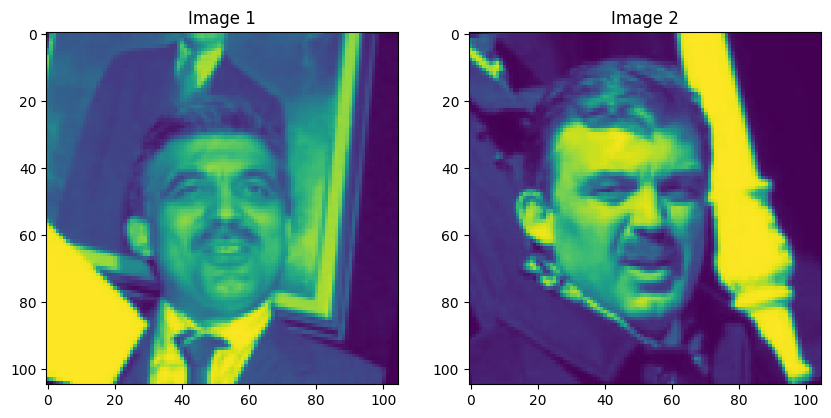

In [13]:
import matplotlib.pyplot as plt

fig,axis=plt.subplots(1,2, figsize=(10,5))
img1, img2, label = dataset[100]
axis[0].imshow(img1.permute(1, 2, 0).numpy())
axis[0].set_title("Image 1")
axis[1].imshow(img2.permute(1, 2, 0).numpy())
axis[1].set_title("Image 2")
plt.show()

In [14]:
from torch.utils.data import random_split
train_size = int(0.7 * len(dataset))
test_size = int(0.2 * len(dataset))
val_size = len(dataset) - train_size - test_size

train_dataset, test_dataset, val_dataset = random_split(dataset, [train_size, test_size, val_size])
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)

In [15]:
learning_rate=0.001
model=SiameseNN().to(device)
initialize_weight(model)
criterion=ContrastiveLoss(margin=1.0)
optimizer=torch.optim.Adam(model.parameters(), lr=learning_rate)
scheduler = MultiplicativeLR(optimizer=optimizer, lr_lambda=lambda epoch: 0.99 )

In [16]:
def train_model(model, train_loader, val_loader, optimizer, criterion, epochs):
    best_val_loss = float('inf')
    training_losses = []
    validation_losses = []
    
    for epoch in range(epochs):
        model.train()
        total_train_loss = 0
        
        for batch_idx, (data1, data2, label) in enumerate(train_loader):
            data1, data2, label = data1.to(device), data2.to(device), label.to(device)
            
            optimizer.zero_grad()
            output1, output2 = model(data1, data2)
            loss = criterion(output1, output2, label)
            loss.backward()
            
        
            # torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            
            optimizer.step()
            total_train_loss += loss.item()
            
            if batch_idx % 10 == 0:
                with torch.no_grad():
                    distances = nn.functional.pairwise_distance(output1, output2)
                    # print (distances)
                    same_dist = distances[label == 0].mean().item() if (label == 0).sum() > 0 else 0
                    diff_dist = distances[label == 1].mean().item() if (label == 1).sum() > 0 else 0
                    
                    print(f'Epoch [{epoch+1}/{epochs}], Batch [{batch_idx+1}/{len(train_loader)}], Loss: {loss.item():.4f}')
                    print(f'  Same person avg distance: {same_dist:.4f}')
                    print(f'  Different person avg distance: {diff_dist:.4f}')
       
        model.eval()
        val_loss = 0
        val_same_distances = []
        val_diff_distances = []
        
        with torch.no_grad():
            for data1, data2, label in val_loader:
                data1, data2, label = data1.to(device), data2.to(device), label.to(device)
                output1, output2 = model(data1, data2)
                loss = criterion(output1, output2, label)
                val_loss += loss.item()
                
                # Track distances by label
                distances = nn.functional.pairwise_distance(output1, output2)
                val_same_distances.extend(distances[label == 0].cpu().numpy())
                val_diff_distances.extend(distances[label == 1].cpu().numpy())
        
        avg_train_loss = total_train_loss / len(train_loader)
        avg_val_loss = val_loss / len(val_loader)
        
        # Store losses for plotting
        training_losses.append(avg_train_loss)
        validation_losses.append(avg_val_loss)
        
        print(f'Epoch [{epoch+1}/{epochs}]:')
        print(f'  Train Loss: {avg_train_loss:.4f}')
        print(f'  Val Loss: {avg_val_loss:.4f}')
        
        if val_same_distances and val_diff_distances:
            avg_same = np.mean(val_same_distances)
            avg_diff = np.mean(val_diff_distances)
            print(f'  Val Same Distance: {avg_same:.4f}')
            print(f'  Val Diff Distance: {avg_diff:.4f}')

        
        
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            torch.save(model.state_dict(), 'best_siamese_model.pth')
            print(f'  New best model saved with val loss: {avg_val_loss:.4f}')
        
        print('-' * 50)
    
    return training_losses, validation_losses

In [17]:
training_losses, validation_losses = train_model(model, train_loader, val_loader,optimizer, criterion,epochs=10)

Epoch [1/10], Batch [1/1375], Loss: 0.0391
  Same person avg distance: 0.1491
  Different person avg distance: 0.1593
Epoch [1/10], Batch [11/1375], Loss: 0.0158
  Same person avg distance: 0.0438
  Different person avg distance: 0.0657
Epoch [1/10], Batch [21/1375], Loss: 0.0231
  Same person avg distance: 0.0493
  Different person avg distance: 0.0715
Epoch [1/10], Batch [31/1375], Loss: 0.0425
  Same person avg distance: 0.0351
  Different person avg distance: 0.0659
Epoch [1/10], Batch [41/1375], Loss: 0.0092
  Same person avg distance: 0.0378
  Different person avg distance: 0.0318
Epoch [1/10], Batch [51/1375], Loss: 0.0585
  Same person avg distance: 0.0458
  Different person avg distance: 0.0552
Epoch [1/10], Batch [61/1375], Loss: 0.0481
  Same person avg distance: 0.0383
  Different person avg distance: 0.0801
Epoch [1/10], Batch [71/1375], Loss: 0.0409
  Same person avg distance: 0.0419
  Different person avg distance: 0.0907
Epoch [1/10], Batch [81/1375], Loss: 0.0595
  Sam

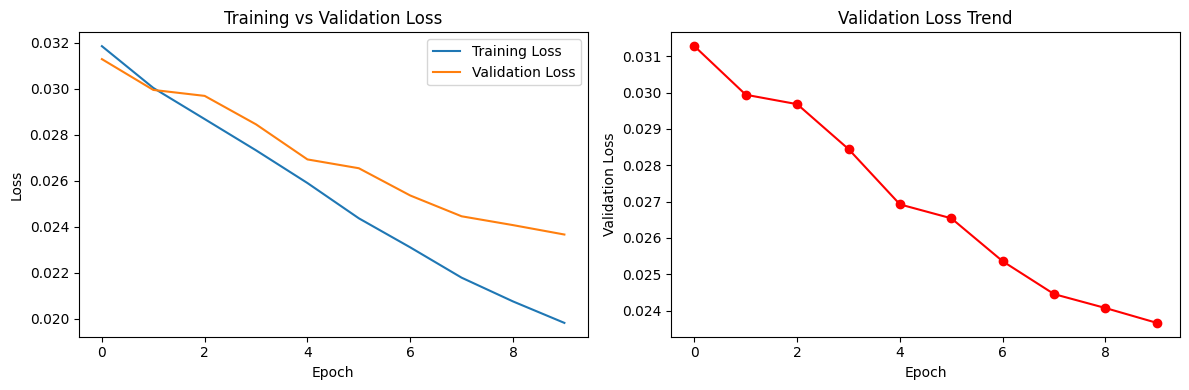

In [18]:
def plot_training_curves(train_losses, val_losses):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training vs Validation Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(val_losses, 'ro-')
    plt.xlabel('Epoch')
    plt.ylabel('Validation Loss')
    plt.title('Validation Loss Trend')
    
    plt.tight_layout()
    plt.show()


plot_training_curves(training_losses, validation_losses)



In [19]:

model.eval()  
testing_losses = []

with torch.no_grad():
    total_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    
    for batch_idx, (data1, data2, label) in enumerate(test_loader):
        data1, data2, label = data1.to(device), data2.to(device), label.to(device)
        
        output1, output2 = model(data1, data2)
        loss = criterion(output1, output2, label)
        total_loss += loss.item()
    
    
    avg_test_loss = total_loss / len(test_loader)
    testing_losses.append(avg_test_loss)

print(f"Average Test Loss: {avg_test_loss:.4f}")



Average Test Loss: 0.0234


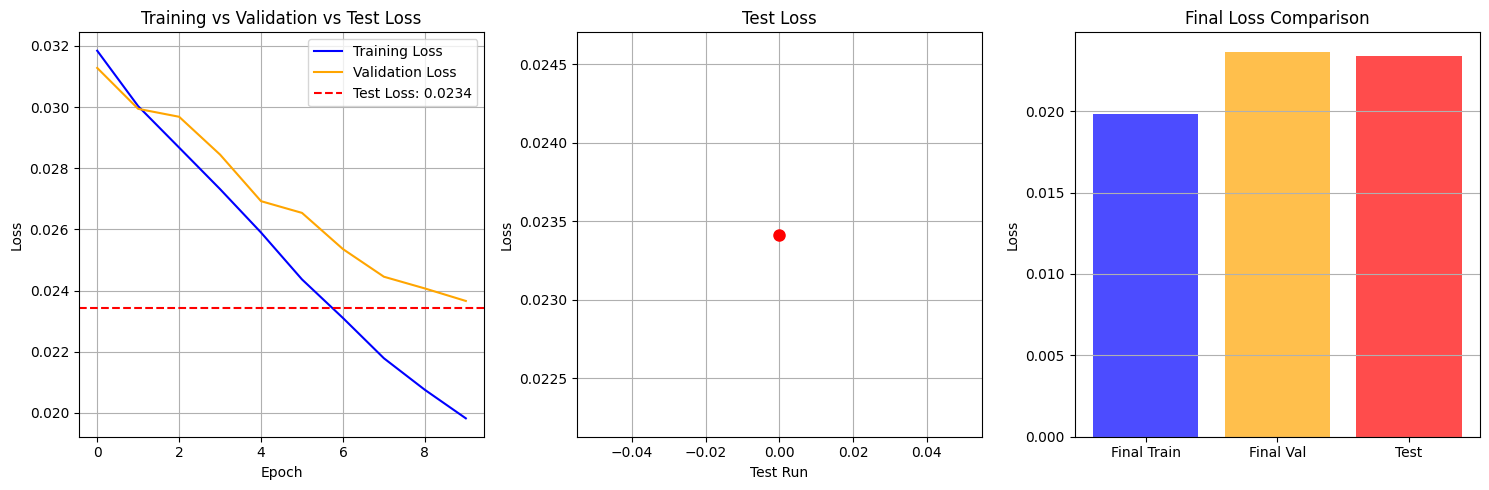

In [20]:

def plot_test_results(test_losses, train_losses=None, val_losses=None):
    if train_losses and val_losses:
        plt.figure(figsize=(15, 5))
        
        plt.subplot(1, 3, 1)
        plt.plot(train_losses, label='Training Loss', color='blue')
        plt.plot(val_losses, label='Validation Loss', color='orange')
        plt.axhline(y=test_losses[0], color='red', linestyle='--', label=f'Test Loss: {test_losses[0]:.4f}')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Training vs Validation vs Test Loss')
        plt.legend()
        plt.grid()
        
        plt.subplot(1, 3, 2)
        plt.plot(test_losses, 'ro-', markersize=8)
        plt.xlabel('Test Run')
        plt.ylabel('Loss')
        plt.title('Test Loss')
        plt.grid()
        
        plt.subplot(1, 3, 3)
        # Loss comparison bar chart
        losses = [train_losses[-1], val_losses[-1], test_losses[0]]
        labels = ['Final Train', 'Final Val', 'Test']
        colors = ['blue', 'orange', 'red']
        plt.bar(labels, losses, color=colors, alpha=0.7)
        plt.ylabel('Loss')
        plt.title('Final Loss Comparison')
        plt.grid(axis='y')
        
    else:
        # Simple test loss plot
        plt.figure(figsize=(6, 4))
        plt.plot(test_losses, 'bo-', markersize=8)
        plt.xlabel('Test Set')
        plt.ylabel('Loss')
        plt.title('Test Loss')
        plt.grid()
    
    plt.tight_layout()
    plt.show()

# Plot results
plot_test_results(testing_losses, training_losses, validation_losses)

In [21]:
model.load_state_dict(torch.load('best_siamese_model.pth', map_location=device))
model.eval()

def evaluate_two_images(model, image1_path, image2_path, transform, device):
    """Compare two images and get similarity score"""
    print(f"Comparing {image1_path} and {image2_path}")
    
    model.eval()
    
    img1 = Image.open(image1_path)
    img2 = Image.open(image2_path)
    
    img1 = transform(img1).unsqueeze(0).to(device)  
    img2 = transform(img2).unsqueeze(0).to(device)
    
    with torch.no_grad():
        
        output1, output2 = model(img1, img2)
        distance= nn.functional.pairwise_distance(output1, output2)
        similarity = 1 - distance.item()
        threshold = 0.5
        is_same_person = distance.item() < threshold
        
    return {
        'distance': distance.item(),
        'similarity': similarity,
        'same_person': is_same_person,
        'confidence': abs(similarity) * 100
    }


In [22]:
all_images= os.listdir(os.path.join(os.getcwd(),'BEI_Images'))
sample_image_path= os.path.join(os.getcwd(), 'BEI_Images', 'Sandesh1.jpg')
all_similarities = []

for  image in all_images:
    image_path = os.path.join(os.getcwd(), 'BEI_Images',image )
    result = evaluate_two_images(model, sample_image_path, image_path, transform, device)
    all_similarities.append({
        'image': image,
        'distance': result['distance'],
        'similarity': result['similarity'],
        'same_person': result['same_person'],
        'confidence': result['confidence']
    })

# Sort by similarity score
all_similarities.sort(key=lambda x: x['similarity'], reverse=True)



Comparing /teamspace/studios/this_studio/BEI_Images/Sandesh1.jpg and /teamspace/studios/this_studio/BEI_Images/Aayush1.jpg
Comparing /teamspace/studios/this_studio/BEI_Images/Sandesh1.jpg and /teamspace/studios/this_studio/BEI_Images/Agrima1.jpg
Comparing /teamspace/studios/this_studio/BEI_Images/Sandesh1.jpg and /teamspace/studios/this_studio/BEI_Images/Amrit1.jpg
Comparing /teamspace/studios/this_studio/BEI_Images/Sandesh1.jpg and /teamspace/studios/this_studio/BEI_Images/Amrit2.jpg
Comparing /teamspace/studios/this_studio/BEI_Images/Sandesh1.jpg and /teamspace/studios/this_studio/BEI_Images/Amrit3.jpg
Comparing /teamspace/studios/this_studio/BEI_Images/Sandesh1.jpg and /teamspace/studios/this_studio/BEI_Images/Anveshan1.jpg
Comparing /teamspace/studios/this_studio/BEI_Images/Sandesh1.jpg and /teamspace/studios/this_studio/BEI_Images/Anveshan2.jpg
Comparing /teamspace/studios/this_studio/BEI_Images/Sandesh1.jpg and /teamspace/studios/this_studio/BEI_Images/Ashish1.jpg
Comparing /team

In [23]:
all_similarities

[{'image': 'Sandesh1.jpg',
  'distance': 6.399999983841553e-05,
  'similarity': 0.9999360000001616,
  'same_person': True,
  'confidence': 99.99360000001616},
 {'image': 'Sandesh2.jpg',
  'distance': 0.00735021336004138,
  'similarity': 0.9926497866399586,
  'same_person': True,
  'confidence': 99.26497866399586},
 {'image': 'Pujan1.jpg',
  'distance': 0.011413861997425556,
  'similarity': 0.9885861380025744,
  'same_person': True,
  'confidence': 98.85861380025744},
 {'image': 'Sandesh5.jpg',
  'distance': 0.011995487846434116,
  'similarity': 0.9880045121535659,
  'same_person': True,
  'confidence': 98.80045121535659},
 {'image': 'Amrit2.jpg',
  'distance': 0.012920025736093521,
  'similarity': 0.9870799742639065,
  'same_person': True,
  'confidence': 98.70799742639065},
 {'image': 'Saroj1.jpg',
  'distance': 0.01717117801308632,
  'similarity': 0.9828288219869137,
  'same_person': True,
  'confidence': 98.28288219869137},
 {'image': 'Matina3.jpg',
  'distance': 0.02020754665136337